In [4]:
# %load main.py
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df_copy = df.copy()

result = df_copy.groupby(['race', 'signs_of_mental_illness']).size().reset_index(name='count')

print(result)

   race  signs_of_mental_illness  count
0     A                    False     69
1     A                     True     24
2     B                    False   1114
3     B                     True    184
4     H                    False    745
5     H                     True    157
6     N                    False     64
7     N                     True     14
8     O                    False     37
9     O                     True     11
10    W                    False   1763
11    W                     True    713


In [6]:
race_counts = df_copy['race'].value_counts()
mental_illness_counts = df_copy[df_copy['signs_of_mental_illness'] == True]['race'].value_counts()

result['percent_mental_illness'] = result.apply(lambda row: (mental_illness_counts[row['race']] / race_counts[row['race']]) * 100, axis=1)

max_percent_race = result.loc[result['percent_mental_illness'].idxmax()]['race']

print(f"Rasa, która charakteryzuje się największym odsetkiem znamion choroby psychicznej: {max_percent_race}")

Rasa, która charakteryzuje się największym odsetkiem znamion choroby psychicznej: W


In [7]:
# Konwersja kolumny 'date' na format daty
df_copy['date'] = pd.to_datetime(df['date'])

# Dodanie kolumny 'day_of_week' oznaczającej dzień tygodnia (0 - poniedziałek, 6 - niedziela)
df_copy['day_of_week'] = df_copy['date'].dt.dayofweek

# Zamiana numerów dnia tygodnia na nazwy
day_names = ['poniedziałek', 'wtorek', 'środa', 'czwartek', 'piątek', 'sobota', 'niedziela']
df_copy['day_of_week'] = df_copy['day_of_week'].map(lambda x: day_names[x])

# Zliczenie interwencji według odpowiedniego dnia tygodnia
interventions_by_day = df_copy['day_of_week'].value_counts()

# Sortowanie dni tygodnia
interventions_by_day = interventions_by_day.reindex(day_names)

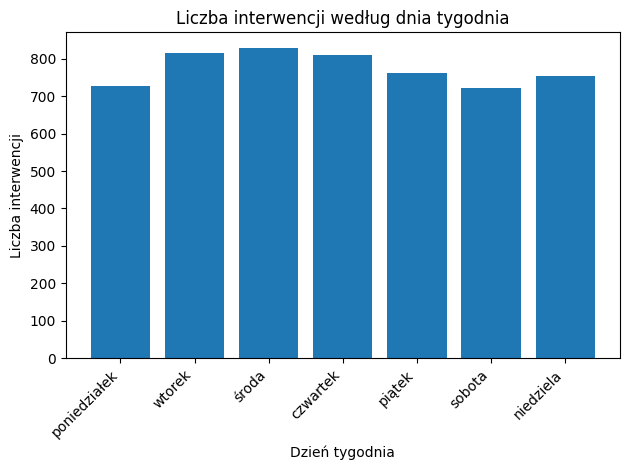

In [8]:
# Tworzenie wykresu kolumnowego
plt.bar(interventions_by_day.index, interventions_by_day.values)
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba interwencji')
plt.title('Liczba interwencji według dnia tygodnia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# Wczytanie danych populacji
population_url = "https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population"
population_data = pd.read_html(population_url, header=0)[0]

#wczytanie stanów
state_url = "https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations"
state_data = pd.read_html(state_url, header=0)[0]

In [12]:
abv_states_all = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
col_name_state = abv_states_all[0].columns[0]
col_name_abv = abv_states_all[0].columns[5]
col_name_abv

pop_states_all = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
col_name = pop_states_all[0].columns[3]
pop_states_all[0].rename(columns={col_name: 'Population'},inplace=True)
pop_states = pop_states_all[0][['State', 'Population']].sort_values(by='State')

#pop_states_all[0].iloc[:,3] - działamy na indeksie
df_by_state = df.groupby('state')['id'].count()
df_by_state.rename_axis("Abbreviation" ,inplace=True)

abv_states_all[0].rename(columns={col_name_state: 'State', col_name_abv: 'Abbreviation'},inplace=True)
abv_states = abv_states_all[0][['State', 'Abbreviation']].sort_values(by='State')
df_pop_partial = pd.merge(pop_states, abv_states,how='inner',on='State' )

# Połączenie skrótów i liczebności populacji z ilością incydentów
df_pop = pd.merge(df_pop_partial, df_by_state ,how='inner',on='Abbreviation' )

# Dodanie kolumny: ilość incydentów na 1000 mieszkańców
df_pop['Per 1000'] = (df_pop.id / df_pop.Population ) *100
df_pop

,State,Population,Abbreviation,id,Per 1000
0,Alabama,5024279,AL,104,0.002070
1,Alaska,733391,AK,39,0.005318
2,Arizona,7151502,AZ,254,0.003552
3,Arkansas,3011524,AR,83,0.002756
4,California,39538223,CA,799,0.002021
5,Colorado,5773714,CO,195,0.003377
6,Connecticut,3605944,CT,21,0.000582
7,Delaware,989948,DE,13,0.001313
8,District of Columbia,689545,DC,13,0.001885
9,Florida,21538187,FL,350,0.001625
